# VDMA Online-Workshop
### KI-Projekte umsetzen - Vorgehensmodell zur Umsetzung

<img src="images/Vorgehen.jpg" alt="drawing" width="550"/>

In diesem Workshop geht es darum, ein KI-Projekt, wie im **VDMA Leitfaden Künstliche Intelligenz** beschrieben, selbstständig umzusetzen. Für die Übung müssen nur Änderungen im folgenden Feld vorgenommen werden. Die Erklärung der einzelnen Parameter werden entlang des Beispielprojekts noch erklärt.

<img src="images/Bearbeiten.jpg" alt="drawing" width="400"/>

In [1]:
# Entscheidungen bezüglich der Datenvorverbereitung
Feature_Alleine = 1                         # "Alleine"-Features erzeugen (0=Nein, 1 = Ja)
Feature_Titel = 1                           # "Titel"-Features erzeugen (0=Nein, 1=Ja)

# Entscheidungen bezüglich des maschinellen Lernverfahrens
Klassifizierer_Typ = 0                       # Eingesetztes maschinelles Lernverfahren (0: Entscheidungsbaum, 1: RandomForest)
Parameter_Entscheidungsbaum_Tiefe = 5        # Einstellbarer Parameter bei Entscheidungsbaum (wenn Klassifizierer_Typ=0)
Parameter_RandomForest_Tiefe = 2             # Einstellbarer Parameter bei RandomForest (wenn Klassifizierer_Typ=1)

### Schritte:
1. Lassen Sie den Code einmal mit den **Starteinstellungen** laufen (kein Feature Engineering, Entscheidungsbaum mit max. Tiefe 2) <br/>
*Nach welchen Kriterien entscheidet das Modell? (siehe Phase 5)*
<br/>

2. Versuchen Sie  die Vorhersagegenauigkeit zu steigern, indem Sie die max. Tiefe (**Parameter_Entscheidungsbaum_Tiefe**) des Entscheidungsbaums auf 4 erhöhen. \
*Konnte die Vorhersagegenauigkeit auf den Testdaten erhöht werden?*
<br/>

3. Steigern Sie die max. Tiefe des Entscheidungsbaums auf 5. \
*Konnte die Vorhersagegenauigkeit weiter erhöht werden? Nach welchen Kriterien entscheidet das Modell hier?*
<br/>

4. Stellen Sie ein, dass im Rahmen der Datenvorbereitung ein zusätzliches Feature erzeugt wird, welches Informationen darüber enthält, ob eine Person alleine oder mit Verwandten an Board der Titanic war (**Feature_Alleine**). \
*Wie hat sich der Datensatz nach der Aufbereitung verändert? Konnte die Vorhersagegenauigkeit erhöht werden?*
<br/>

5. Stellen Sie zusätzlich ein, dass im Rahmen der Datenvorbereitung ein zusätzliches Feature erzeugt wird, welches Informationen zum Titel der Personen aus deren Namen ableitet (**Feature_Titel**). \
*Wie hat sich der Datensatz nach der Aufbereitung verändert? Konnte die Vorhersagegenauigkeit erhöht werden?*
<br/>

6. Nun konzentrieren wir uns nur noch auf das maschinelle Lernverfahren. Neben Entscheidungsbäumen existieren auch weitere maschinelle Lernverfahren wie RandomForest. Diese können oftmals komplexere Zusammenhänge erlernen, allerdings wird die Interpretation der gelernten Zusammenhänge auch schwieriger. Stellen Sie ein, dass RandomForest nun zur Vorhersage genutzt wird (**Klassifizierer_Typ**). \
*Wie hat sich die Vorhersagegenauigkeit verändert?*
<br/>

7. Versuchen Sie nun durch die Einstellung des Hyperparameters von RandomForest (**Parameter_RandomForest_Tiefe**) die Vorhersagegenauigkeit zu verbessern (Bereich von 2 bis 100). \
*Was ist der optimale Wert für "RandomForest_Tiefe"? Wie verändern sich die Vorhersagegenauigkeiten auf den Trainungsdaten und den Testdaten?*

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

### Tipp: Wenn Sie Änderungen durchgeführt haben, können sie den Code über den folgenden Befehl ausführen:

<img src="images/Jupyter.jpg" alt="drawing" width=800 />

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 1 – Das Fundament: Das gemeinsame Geschäfts- und Projektverständnis 
![](images/Titanic.jpg)
<div style="text-align: right"> Bildquelle: Pixabay </div>

### Ausgangssituation
Historiker wollen sich mit dem Leben der Überlebenden der Titanic-Katastrophe beschäftigen. Heute sind nurnoch Interviews mit Nachkommen der Überlebenden möglich und die Suche nach diesen Nachkommen erweist sich als extrem zeitaufwändig. Es existiert im Archiv ein Datensatz mit Überlebenden der Katastrophe, allerdings konnten hier keine Nachkommen gefunden werden. Es existiert auch eine weitere Liste, allerdings fehlen hier die Angaben, ob die Personen überlebt haben und die Historiker haben nicht die Zeit eine Recherche für jede Person auf der Liste durchzuführen.

### Ziel
Ihr Aufgabe besteht daher darin, eine KI-Anwendung zu entwickeln, welche auf Basis der zur Verfügung stehenden Daten zu jeder Person (Alter, Geschlecht, Klasse etc.) eine Prognose aufzustellt, ob diese Person überlebt hat. Mit Hilfe Ihrer KI-Anwendung wollen die Historiker nur Recherchen für Personen durchführen, welche vermutlich auch überlebt hatten.


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 2 – Die tragenden Säulen: Das Technologie-, Prozess- und Datenverständnis

In [2]:
# Bibliotheken zur Bearbeitung von Daten
import pandas as pd
import numpy as np
import random as rnd

# Bibliotheken um Daten zu Visualisieren
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Bibliotheken zum Maschinellen Lernen
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

### Welche Daten stehen zur Verfügung?

In [3]:
# Laden der Daten und Betrachtung der ersten 5 Zeilen
Daten = pd.read_csv('./input/Titanic_Datensatz.csv')
Daten.head()

,PassagierID,Lebendig,Klasse,Name,Geschlecht,Alter,GeschwPartner,ElterKind,Ticketnummer,Preis,Kabine,Hafen
0,1,0,3,"Braund, Mr. Owen Harris",Mann,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Frau,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",Frau,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Frau,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",Mann,35.0,0,0,373450,8.0500,NaN,S


- **PassagierID**: Eindeutige ID für jeden Passagier
- **Lebendig**: Ob der Passagier überlebt hat oder nicht und der von uns vorhergesagte Wert (0=Nein, 1=Ja)
- **Klasse**: Die Klasse des Tickets, das der Passagier gekauft hat (1=1. Klasse, 2=2. Klasse, 3=3. Klasse)
- **Name**: Der Name des Passagiers
- **Geschlecht**: Das Geschlecht des Passagiers
- **Alter**: Das Alter des Passagiers in Jahren
- **GeschwPartner**: Die Anzahl der Geschwister oder Ehepartner, die der Passagier an Bord der Titanic hatte
- **ElterKind**: Die Anzahl der Eltern oder Kinder, die der Passagier an Bord der Titanic hatte
- **Ticketnummer**: Die Ticketnummer des Passagiers
- **Preis**: Der Ticketpreis, den der Fahrgast bezahlt hat
- **Kabine**: Die Kabinennummer des Passagiers
- **Hafen**: Der Hafen, in dem der Passagier eingestiegen ist (C=Cherbourg, Q=Queenstown, S=Southampton)

### Gibt es Datenlücken oder häufige Ausreißer?

<img src="images/Fehler.jpg" alt="drawing" width="500"/>

In [4]:
#Betrachtung der Zahlenwerte
Daten.describe()

,PassagierID,Lebendig,Klasse,Alter,GeschwPartner,ElterKind,Preis
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Betrachtung der textuellen Werte
Daten.describe(include=['O'])

,Name,Geschlecht,Ticketnummer,Kabine,Hafen
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Eustis, Miss. Elizabeth Mussey",Mann,1601,B96 B98,S
freq,1,577,7,4,644


### Was kann noch aus den Daten herausgelesen werden?
Welchen Einfluss hat das Alter?

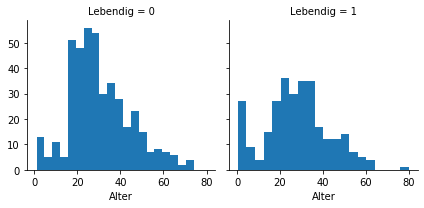

In [6]:
#Erstellung eines Diagramms mit der Altersverteilung bei Personen die überlebt haben bzw. nicht überlebt haben
g = sns.FacetGrid(Daten, col='Lebendig')
g.map(plt.hist, 'Alter', bins=20)

Welchen Einfluss haben die Klasse (1./2./3. Klasse) zusammen mit dem Alter?

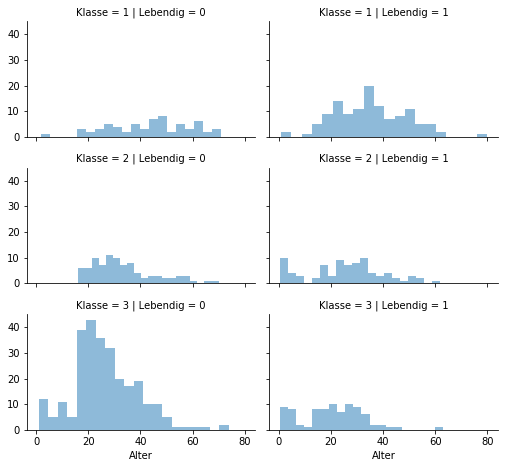

In [7]:
#Weitere Aufteilung des vorherigen Diagramms, nur dass hier auch zusätzlich die Klassen unterschieden werden
grid = sns.FacetGrid(Daten, col='Lebendig', row='Klasse', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Alter', alpha=.5, bins=20)
grid.add_legend();

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 3 – Der Rohbau: Die Datenvorbereitung

### Bereinigen der Daten
Laut den Historikern lassen sich aus den Kabinenbezeichnungen und PassagierID keine Informationen ableiten. Sie haben zudem gesehen, dass diese bei den meisten Personen garnicht angegeben wurden. Auch die Ticketnummern wurden laut den Historikern zufällig erstellt und enthalten daher keine Informationen. Sie beschließen daher Ticketnummern, PassagierID und Kabinenbezeichnungen zu ignorieren.

In [8]:
#Löschen der Spalten "Ticketnummer", "PassagierID" und "Kabine"
Daten = Daten.drop(['Ticketnummer', 'PassagierID', 'Kabine'], axis=1)

Leider fehlen im Datensatz bei manchen Personen die Angaben zum Alter. Sie beschließen daher bei den fehlenden Altersangaben den Alterdurchschnitt über alle Personen einzusetzen.

In [9]:
#Ersetzen aller fehlenden Altersangaben durch den Durchschnittswert
Daten['Alter'].fillna(Daten['Alter'].median(), inplace = True)

Auch fehlen teilweise die Angaben zum Einstiegshafen der Personen, wobei hier der Hafen mit den meisten Passagierzugängen eingesetzt wird (Hafen S=Southampton).

In [10]:
#Ersetzen der fehlenden Hafenangaben durch den am häufigsten auftredenden Wert
Daten['Hafen'].fillna(Daten['Hafen'].mode()[0], inplace = True)

In [11]:
#Prüfen ob wirklich keine Datenlücken mehr vorhanden sind
Daten.isnull().sum()

Lebendig         0
Klasse           0
Name             0
Geschlecht       0
Alter            0
GeschwPartner    0
ElterKind        0
Preis            0
Hafen            0
dtype: int64

### Feature Engineering

<img src="images/Einstellung.jpg" alt="drawing"  width="80" align="left"/>

<div style="position:relative;left:20px"> Die Historiker nehmen an, dass die Gesamtzahl an Verwandten und Partnern an Board nicht so wichtig ist. Gerade beim betreten der Rettungsbote könnte allerdings entscheidend gewesen sein, ob man alleine war oder nicht. </div> 

In [12]:
#Wenn Feature_Alleine = 1 werden GeschwPartner und ElterKind konsolidiert und an ihrer Stelle eine Spalte "Alleine" eingefügt
if Feature_Alleine == 1:
    Daten['Familie'] = Daten['GeschwPartner'] + Daten['ElterKind']
    Daten['Alleine'] = 0
    Daten.loc[Daten['Familie'] == 0, 'Alleine'] = 1
    Daten = Daten.drop(['Familie', 'GeschwPartner', 'ElterKind'], axis=1)
    show = Daten[['Alleine', 'Lebendig']].groupby(['Alleine'], as_index=False).mean()
    print(show)

   Alleine  Lebendig
0        0  0.505650
1        1  0.303538


<img src="images/Einstellung.jpg" alt="drawing"  width="80" align="left"/>

<div style="position:relative;left:20px"> Die Historiker weisen Sie zudem darauf hin, dass in den Namen auch Titel enthalten sind. Sie vermuten, dass sich in den verschiedenen Titelbezeichnungen neben dem Geschlecht zusätzliche Informationen (z. B. Rang) verbergen. Sie extrahieren daher zunächst die Titel.</div>


In [13]:
#Wenn Feature_Titel = 1 werden in der Spalte "Namen" 
if Feature_Titel == 1:
    Daten['Titel'] = Daten.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    #Gegenüberstellen von Titel und Geschlecht
    show = pd.crosstab(Daten['Titel'], Daten['Geschlecht']) 
    print(show)

Geschlecht  Frau  Mann
Titel                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


Es zeigt sich, dass viele unterschiedliche Titel in den Namen enthalten sind und diese auch Rückschlüsse zur Hierarchie (z. B. Master) ziehen lassen und bei Frauen die zusätzliche Information besitzen, ob diese verheiratet sind oder nicht (Miss=unverheiratet, Mrs=verheiratet). Sie beschließen daher, diese Informationen mitaufzunehmen und seltene Titelbezeichnungen zusammenzufassen.

In [14]:
if Feature_Titel == 1:
    Daten['Titel'] = Daten['Titel'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Selten')
    Daten['Titel'] = Daten['Titel'].replace('Mlle', 'Miss')
    Daten['Titel'] = Daten['Titel'].replace('Ms', 'Miss')
    Daten['Titel'] = Daten['Titel'].replace('Mme', 'Mrs')
    Daten['Titel'] = Daten['Titel'].fillna(0)
    #Gegenüberstellen von Titel und Überlebenswahrscheinlichkeit rein auf Basis des Titels
    show = Daten[['Titel', 'Lebendig']].groupby(['Titel'], as_index=False).mean()
    print(show)

    Titel  Lebendig
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4  Selten  0.347826


Da die meisten Lernalgorithmen mit einfachem Text nicht arbeiten können, werden die textuellen Werte zudem in Zahlenwerte umgewandelt.

In [15]:
#Löschen der Spalte "Namen"
Daten = Daten.drop(['Name'], axis=1)
#Ersetzen von Mann/Frau mit 0/1
Daten['Geschlecht'] = Daten['Geschlecht'].map( {'Frau': 1, 'Mann': 0} ).astype(int)
#Aufteilung der restlichen textuellen Werte in einzelne Spalten (sog. One-Hot Encoding)
Daten = pd.get_dummies(Daten, sparse=True)

<img src="images/Aufbereiteter_Datensatz.jpg" alt="drawing" width="400"/>

Der aufbereitete Datensatz sieht nun wiefolgt aus:

In [16]:
Daten.head()

,Lebendig,Klasse,Geschlecht,Alter,Preis,Alleine,Hafen_C,Hafen_Q,Hafen_S,Titel_Master,Titel_Miss,Titel_Mr,Titel_Mrs,Titel_Selten
0,0,3,0,22.0,7.2500,0,0,0,1,0,0,1,0,0
1,1,1,1,38.0,71.2833,0,1,0,0,0,0,0,1,0
2,1,3,1,26.0,7.9250,1,0,0,1,0,1,0,0,0
3,1,1,1,35.0,53.1000,0,0,0,1,0,0,0,1,0
4,0,3,0,35.0,8.0500,1,0,0,1,0,0,1,0,0


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 4 – Das Herzstück: Die Modellierung
### Die aufbereiteten Daten werden zum Trainieren in einem maschinellen Lernverfahren eingesetzt

Um das trainierte Modell bzw. den Klassifizierer testen zu können. Wird der bestehende Datensatz in einen Trainingsdatensatz und einen Testdatensatz aufgeteilt. Auf dem Trainingsdatensatz wird der Klassifizierer erlernt und anschließend auf den neuen Daten im Testdatensatz evaluiert.
<img src="images/Train_Test.jpg" alt="drawing" width="700"/>

<img src="images/Einstellung.jpg" alt="drawing"  width="80" align="left"/>

<div style="position:relative;left:20px"> Hier wird entschieden, welches maschinelle Lernverfahren eingesetzt werden soll und wie dessen Hyperparameter eingestellt werden. Im Feld zur Bearbeitung können Sie wählen zwischen Entscheidungsbaum (Klassifizierer_Typ = 0) und RandomForest (Klassifizierer_Typ = 1) sowie deren einstellbaren Hyperparametern (Parameter_Entscheidungsbaum_Tiefe bzw. Parameter_RandomForest_Tiefe) </div> 

In [17]:
#Aufteilung der Daten die Spalten mit Features (X_Daten) und der Spalte mir der vorherzusagenen Werten (Y_Daten) 
X_Daten = Daten.drop("Lebendig", axis=1)
Y_Daten = Daten["Lebendig"]

#Um das Ergebnis testen zu können, werden nur 70% zum lernen verwendet (Train) und 30% zum testen beibehalten (Test) 
X_train, X_test, Y_train, Y_test = train_test_split(X_Daten, Y_Daten, test_size=0.30, random_state=42)

#Auswahl des maschinellen Lernverfahrens für den Klassifizierer
if Klassifizierer_Typ == 0 :
    Klassifizierer = DecisionTreeClassifier(max_depth=Parameter_Entscheidungsbaum_Tiefe, random_state = 42, min_samples_split = 0.1)
elif  Klassifizierer_Typ == 1:
    Klassifizierer = RandomForestClassifier(max_depth=Parameter_RandomForest_Tiefe, random_state = 42) #, min_samples_split = 0.1
#Das eigentliche Trainieren des Modells
Klassifizierer.fit(X_train, Y_train)

#Berechnung der Vorhersagegenauigkeit auf den Trainings- und Testdaten
Vorhersagegenauigkeit_train = round(Klassifizierer.score(X_train, Y_train) * 100, 2)
Vorhersagegenauigkeit_test = round(Klassifizierer.score(X_test, Y_test) * 100, 2)
print("Vorhersagegenauigkeit auf Trainingsdaten = ", Vorhersagegenauigkeit_train, "%\n Vorhersagegenauigkeit auf Testdaten =", Vorhersagegenauigkeit_test, "%")

Vorhersagegenauigkeit auf Trainingsdaten =  84.11 %
 Vorhersagegenauigkeit auf Testdaten = 82.84 %


<img src="images/Vergleich_Experimente.jpg" alt="drawing" width="400"/>

In [18]:
#Laden der Datei mit vorherigen Experimenten
Ergebnisse = pd.read_csv('./input/Ergebnisse.csv')

#Erstellung einer neuen Zeile mit den eingestellten Parametern und den Ergebnissen
if Klassifizierer_Typ == 0 :
    Parameter = 'Entscheidungsbaum_Tiefe: ' + str(Parameter_Entscheidungsbaum_Tiefe)
else :
    Parameter = 'RandomForest_Tiefe: ' + str(Parameter_RandomForest_Tiefe)
Neuer_Versuch = pd.DataFrame({'Feature_Alleine':Feature_Alleine, 'Feature_Titel':Feature_Titel, 'Klassifizierer_Typ':Klassifizierer_Typ, 'Parameter':Parameter, 'Vorhersagegenauigkeit_Train':str(Vorhersagegenauigkeit_train)+" %", 'Vorhersagegenauigkeit_Test': str(Vorhersagegenauigkeit_test)+" %"}, index=[0])
Ergebnisse = [Ergebnisse, Neuer_Versuch]

#Zusammenführung der vergangenen und der neuen Ergebnisse und speichern der aktualisierten Liste
Ergebnisse = pd.concat(Ergebnisse)
Ergebnisse.to_csv('./input/Ergebnisse.csv',index=False)
Ergebnisse = pd.read_csv('./input/Ergebnisse.csv')
Ergebnisse

,Feature_Alleine,Feature_Titel,Klassifizierer_Typ,Parameter,Vorhersagegenauigkeit_Train,Vorhersagegenauigkeit_Test
0,1,1,0,4,84.11,82.84
1,1,1,0,4,84.11,82.84
2,1,1,0,4,84.11,82.84
3,1,1,0,5,84.11,82.84
4,1,1,0,5,84.11,82.84
...,...,...,...,...,...,...
87,0,0,0,Entscheidungsbaum_Tiefe: 5,83.15 %,81.34 %
88,0,0,0,Entscheidungsbaum_Tiefe: 2,80.58 %,77.24 %
89,0,0,0,Entscheidungsbaum_Tiefe: 5,83.15 %,81.34 %
90,1,1,0,Entscheidungsbaum_Tiefe: 5,84.11 %,82.84 %


### Ziel ist es, die Vorhersagegenauigkeit des Modells auf neuen, ungesehen Daten zu testen und die Genauigkeit hierfür (Vorhersagegenauigkeit_Test) zu erhöhen. Sollte die Vorhersagegenauigkeit auf den Trainingsdaten (Vorhersagegenauigkeit_Train) weitaus höher sein, scheinen hier Zusammenhänge gelernt zu werden, welche eigentlich nicht existieren (sog. Overfitting)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 5 – Die Wertschöpfung: Die Auswertung

### Wie weit reduziert sich der Aufwand der Historiker? Wie hoch ist die Wahrscheinlichkeit, dass Nachkommen einer Person gesucht werden und es sich herausstellt, dass diese Person doch nicht überlebt hatte?

In [19]:
Fehlerquote = round(100-Vorhersagegenauigkeit_test, 2)
Personenzahl = 200
Recherche_bisher = int(Personenzahl*62/100)
Recherche_umsonst = int(Personenzahl*Fehlerquote/100)
print("Die Wahrscheinlichkeit Aufwände in die Recherche bei falschen Personen durchzuführen ist", Fehlerquote, "%.\n \
Laut den Historikern soll noch bei höchstens",Personenzahl," weiteren Personen eine Recherche durchgeführt werden.\n \
Bei zufälliger Auswahl wären hier ca. ",Recherche_bisher," Recherchen umsonst (da laut den Daten ca. 62 % nicht überlebt haben).\n \
Mit dem Vorhersagemodell reduziert sich die Anzahl der nicht notwendig gewesenen Recherchen auf ca.",Recherche_umsonst, ".")

Die Wahrscheinlichkeit Aufwände in die Recherche bei falschen Personen durchzuführen ist 17.16 %.
 Laut den Historikern soll noch bei höchstens 200  weiteren Personen eine Recherche durchgeführt werden.
 Bei zufälliger Auswahl wären hier ca.  124  Recherchen umsonst (da laut den Daten ca. 62 % nicht überlebt haben).
 Mit dem Vorhersagemodell reduziert sich die Anzahl der nicht notwendig gewesenen Recherchen auf ca. 34 .


### Nach welchen Kriterien werden im Modell die Entscheidungen getroffen? 

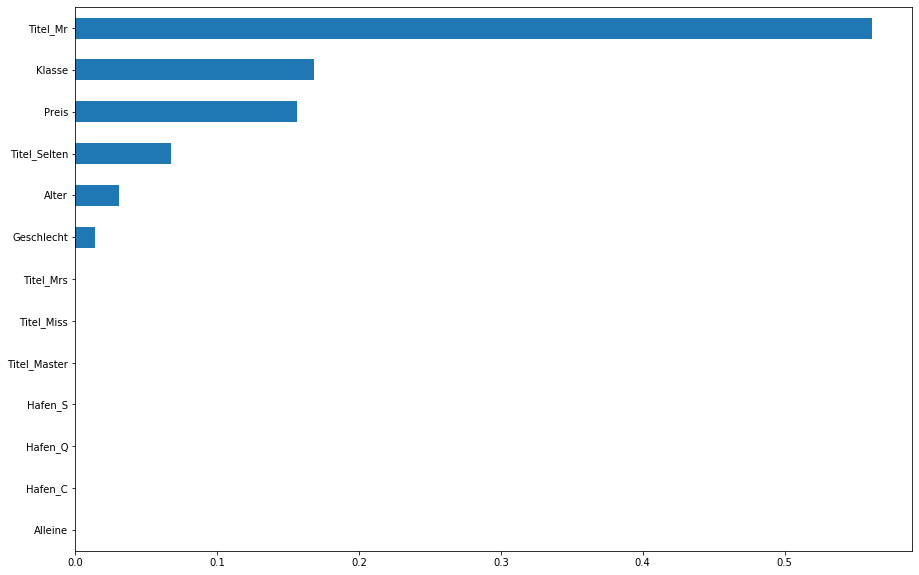

In [20]:
feat_importances = pd.Series(Klassifizierer.feature_importances_, index=X_train.columns)
fig_importance = plt.figure(figsize=(15,10))
fig_importance = feat_importances.nsmallest(20).plot(kind='barh', fontsize=10)
fig_importance

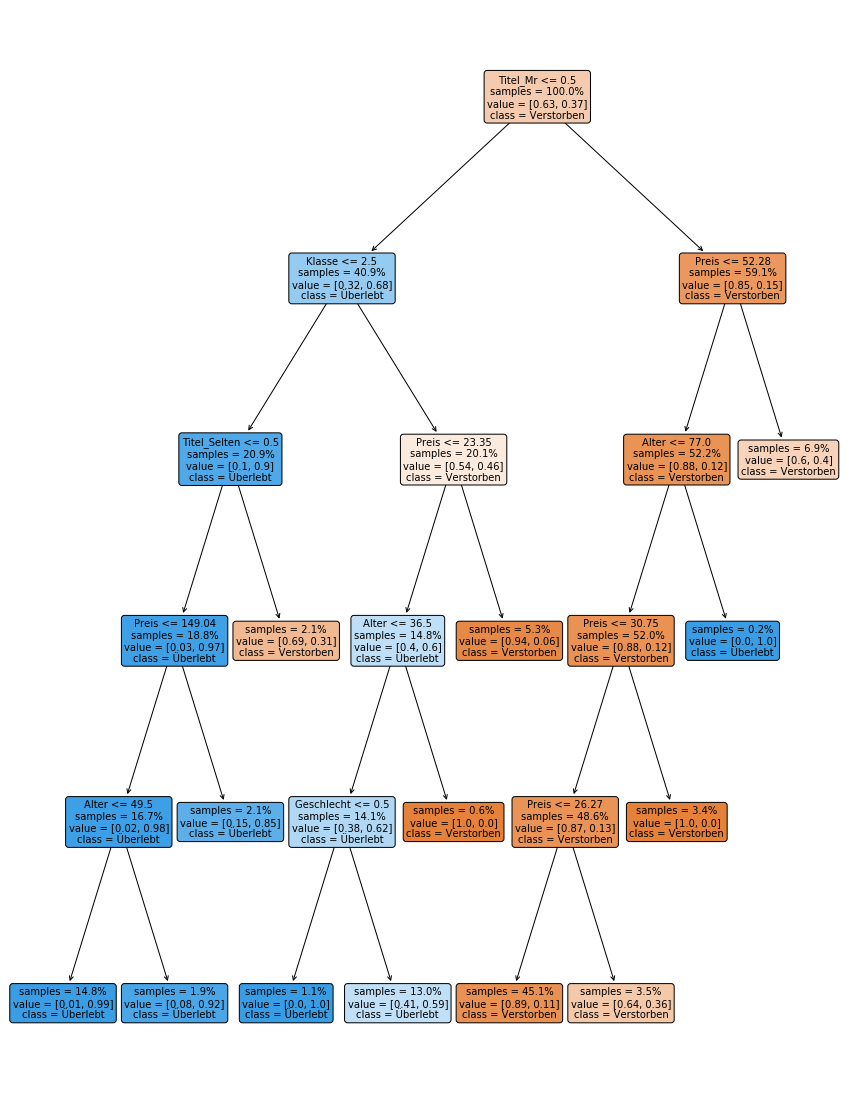

In [21]:
if Klassifizierer_Typ == 0:
    fig_tree = plt.figure(figsize=(15,20))
    fig_tree = plot_tree(Klassifizierer, feature_names=X_train.columns, class_names=['Verstorben', 'Überlebt'], filled=True, fontsize=10, proportion=True, rounded=True, precision=2, impurity=False)
elif  Klassifizierer_Typ == 1:
    print("Die Baumstruktur kann nur bei Entscheidungsbäumen angezeigt werden")

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 6 – Die geschaffene Lösung: Bereitstellung
### Die Historiker konnten bereits eine Liste von Personen ausfindig machen und möchten nun bei den  Personen Vorhersagen treffen, ob diese überlebt haben. Im unteren Feld können Sie sich auch eigene Personen erdenken und der Liste hinzufügen.

In [22]:
# Person für die Vorhersage selber definieren
Person = {'PassagierID':[1310], 'Klasse':[1], 'Name':['Bukater, Rose DeWitt'], 'Geschlecht':['Frau'], 'Alter':[17] \
          , 'GeschwPartner':[0],'ElterKind':[2], 'Ticketnummer':['PC 17601'], 'Preis':[88.5], 'Kabine':['B12'], 'Hafen':['S']} 

In [23]:
# Laden der neuen Daten
personenliste_df = pd.read_csv('./input/Titanic_Personenliste.csv') 
personenliste_df = personenliste_df.append(pd.DataFrame(Person), ignore_index=True)
personenliste_df

,PassagierID,Klasse,Name,Geschlecht,Alter,GeschwPartner,ElterKind,Ticketnummer,Preis,Kabine,Hafen
0,912,1,"Rothschild, Mr. Martin",Mann,55.00,1,0,PC 17603,59.4000,NaN,C
1,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",Frau,48.00,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
2,892,3,"Kelly, Mr. James",Mann,34.50,0,0,330911,7.8292,NaN,Q
3,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",Mann,0.33,0,2,347080,14.4000,NaN,S
4,893,3,"Wilkes, Mrs. James (Ellen Needs)",Frau,47.00,1,0,363272,7.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1306,1,"Oliva y Ocana, Dona. Fermina",Frau,39.00,0,0,PC 17758,108.9000,C105,C
414,1307,3,"Saether, Mr. Simon Sivertsen",Mann,38.50,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
415,1308,3,"Ware, Mr. Frederick",Mann,NaN,0,0,359309,8.0500,NaN,S
416,1309,3,"Peter, Master. Michael J",Mann,NaN,1,1,2668,22.3583,NaN,C


In [24]:
#Durchlaufen der Datenaufbereitung
liste_df = personenliste_df
liste_df = liste_df.drop(['Ticketnummer', 'PassagierID', 'Kabine'], axis=1)
liste_df['Alter'].fillna(liste_df['Alter'].median(), inplace = True)
liste_df['Hafen'].fillna(liste_df['Hafen'].mode()[0], inplace = True)
if Feature_Alleine == 1:
    liste_df['Familie'] = liste_df['GeschwPartner'] + liste_df['ElterKind']
    liste_df['Alleine'] = 0
    liste_df.loc[liste_df['Familie'] == 0, 'Alleine'] = 1
    liste_df = liste_df.drop(['Familie', 'GeschwPartner', 'ElterKind'], axis=1)
if Feature_Titel == 1:
    liste_df['Titel'] = liste_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    liste_df['Titel'] = liste_df['Titel'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Selten')
    liste_df['Titel'] = liste_df['Titel'].replace('Mlle', 'Miss')
    liste_df['Titel'] = liste_df['Titel'].replace('Ms', 'Miss')
    liste_df['Titel'] = liste_df['Titel'].replace('Mme', 'Mrs')
    #liste_df['Titel'] = liste_df['Titel'].fillna(0)
liste_df = liste_df.drop(['Name'], axis=1)
liste_df['Geschlecht'] = liste_df['Geschlecht'].map( {'Frau': 1, 'Mann': 0} ).astype(int)
liste_df = pd.get_dummies(liste_df, sparse=True)

Nun wird der zuvor auf historischen Daten trainierte Klassifizierer auf die neue Personenliste angewandt

In [25]:
Vorhersage = Klassifizierer.predict(liste_df)
Vorhersage_proba = Klassifizierer.predict_proba(liste_df)
personenliste_df['Lebendig (Vorhersage)'] = Vorhersage
personenliste_df['Wahrscheinlichkeit'] = Vorhersage_proba[:, [1]]*100
personenliste_df

,PassagierID,Klasse,Name,Geschlecht,Alter,GeschwPartner,ElterKind,Ticketnummer,Preis,Kabine,Hafen,Lebendig (Vorhersage),Wahrscheinlichkeit
0,912,1,"Rothschild, Mr. Martin",Mann,55.00,1,0,PC 17603,59.4000,NaN,C,0,39.534884
1,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",Frau,48.00,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,1,84.615385
2,892,3,"Kelly, Mr. James",Mann,34.50,0,0,330911,7.8292,NaN,Q,0,11.032028
3,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",Mann,0.33,0,2,347080,14.4000,NaN,S,1,100.000000
4,893,3,"Wilkes, Mrs. James (Ellen Needs)",Frau,47.00,1,0,363272,7.0000,NaN,S,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1306,1,"Oliva y Ocana, Dona. Fermina",Frau,39.00,0,0,PC 17758,108.9000,C105,C,0,30.769231
414,1307,3,"Saether, Mr. Simon Sivertsen",Mann,38.50,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,11.032028
415,1308,3,"Ware, Mr. Frederick",Mann,NaN,0,0,359309,8.0500,NaN,S,0,11.032028
416,1309,3,"Peter, Master. Michael J",Mann,NaN,1,1,2668,22.3583,NaN,C,1,100.000000


&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 7 – Die Weiterentwicklung: Die fortlaufende Datensammlung
### Bei den Recherchen der Nachkommen ergeben sich zusätzliche Informationen, ob die Personen die Titanic-Katastrophe überlebt hatten oder nicht. Diese können den bestehenden Datensatz ergänzen.

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

# Phase 8 – Die fortlaufende Überprüfung: Die Wartung
### Mit hinzukommenden Daten (bzw. Informationen ob weitere Personen überlebt hatten oder nicht) kann das bestehende Modell evaluiert werden. Sollte die Fehlerquote weitaus höher als bei den Testdaten sein, scheinen die Zusammenhänge aus den neuen Datenquellen nicht übereinzustimmen. Beispielsweise könnte es sich bei den neuen Informationen rein um Beschäftigte an Board der Titanic handeln. Hier könnten andere Zusammenhänge hinsichtlich Alter, Geschlecht etc. und der Überlebenswahrscheinlichkeit bestehen. Auch könnten hier neue Titel auftreten, welche wesentliche Informationen beinhalten (z. B. "Mate" für Matrosen). 